#            SEGUNDO DESAFÍO DH - GRUPO 7

### Integrantes Grupo:
    Daniela Rodriguez
    Mercedes Dorado
    Matias Chaves
    Edgar Wendler
    Nashira Calvo

> El objetivo del proyecto es entender, limpiar y analizar la base de datos de Properati, es una plataforma web y mobile de propiedades que comprenden operaciones de venta y alquiler en el periodo 2017 en el país de Argentina.

###  EXPLORATIVE DATA ANALYSIS (EDA)

El análisis de la base de datos esta organizado de la siguiente manera:  <br>
    **1. ENTENDER LA BASE DE DATOS <br>
    2. LIMPIAR LA BASE DE DATOS** <br>
       2.1 VARIABLES CUANTITATIVAS: OUTLIERS Y MISSING VALUES <br>
       2.2 VARIABLES CUALITATIVAS: MISSING VALUES <br>
    **3. EXTRAER INFORMACION EXTRA CON EXPRESIONES REGULARES** <br>   

## 1. IMPORTACIÓN DE LA BASE DE DATOS LIMPIA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
# Importamos la api para realizar nuestro modelo de regresión lineal
import statsmodels.api as sm

In [2]:
#Importamos la base de datos del desafío I
datapro = pd.read_csv('data/dataframe_limpio.csv', sep=";")
datapro.shape

(121207, 17)

In [3]:
datapro.columns

Index(['Unnamed: 0', 'property_type', 'lon', 'lat', 'state_name', 'Provincia',
       'Localidad', 'price_usd', 'surface_covered_in_m2', 'rooms', 'Patio',
       'Paga expensas', 'A_estrenar', 'Ascensor', 'Orientacion_al_frente',
       'Orientacion_lateral', 'Orientacion_contrafrente'],
      dtype='object')

In [4]:
datapro.describe()

,Unnamed: 0,lon,lat,price_usd,surface_covered_in_m2,rooms
count,121207.000000,69662.000000,69662.000000,8.758600e+04,101306.000000,47388.000000
mean,60609.529499,-59.266137,-34.626779,2.598451e+05,133.052909,3.080843
std,34994.356657,2.299199,1.975482,3.750582e+05,724.376392,1.860812
min,0.000000,-71.665143,-54.823985,5.000000e+03,0.000000,1.000000
25%,30303.500000,-58.727181,-34.669075,1.000000e+05,45.000000,2.000000
50%,60607.000000,-58.480128,-34.597985,1.600000e+05,75.000000,3.000000
75%,90915.500000,-58.395906,-34.441234,2.900000e+05,150.000000,4.000000
max,121219.000000,-53.733330,-23.137164,2.500000e+07,187000.000000,32.000000


In [5]:
#Seleccionamos sólamente Capital Federal y departamentos
data = datapro.loc[(datapro["state_name"] == 'Capital Federal') & (datapro["property_type"] == 'apartment')]

In [6]:
data.head()

,Unnamed: 0,property_type,lon,lat,state_name,Provincia,Localidad,price_usd,surface_covered_in_m2,rooms,Patio,Paga expensas,A_estrenar,Ascensor,Orientacion_al_frente,Orientacion_lateral,Orientacion_contrafrente
2,2,apartment,-58.522982,-34.652262,Capital Federal,Capital Federal,Mataderos,72000.0,55.0,NaN,False,True,False,True,False,True,False
7,7,apartment,-58.443362,-34.559873,Capital Federal,Capital Federal,Belgrano,138000.0,40.0,NaN,False,False,True,False,False,False,False
8,8,apartment,-58.443362,-34.559873,Capital Federal,Capital Federal,Belgrano,195000.0,60.0,NaN,False,False,True,False,False,False,False
13,13,apartment,NaN,NaN,Capital Federal,Capital Federal,Palermo,111700.0,30.0,1.0,False,False,False,False,True,False,False
14,14,apartment,NaN,NaN,Capital Federal,Capital Federal,Palermo,147900.0,31.0,1.0,False,False,False,False,False,False,False


In [7]:
#Reducimos la dimensionalidad de los barrios a comunas
# create a list of our conditions
conditions = [
   (data['Localidad'] == 'Constitución') | (data['Localidad'] == 'Puerto Madero')|(data['Localidad'] == 'San Telmo')|(data['Localidad'] == 'Monserrat')|(data['Localidad'] == 'Retiro')|(data['Localidad'] == 'San Nicolás')|(data['Localidad'] == 'Centro / Microcentro')|(data['Localidad'] == 'Tribunales'),
   (data['Localidad'] == 'Barrio Norte') | (data['Localidad'] == 'Recoleta'),
   (data['Localidad'] == 'Balvanera') |(data['Localidad'] == 'San Cristobal') | (data['Localidad'] == 'Abasto')| (data['Localidad'] == 'Congreso')| (data['Localidad'] == 'Once'),
   (data['Localidad'] == 'Barracas')|(data['Localidad'] == 'Boca')|(data['Localidad'] == 'Parque Patricios')|(data['Localidad'] == 'Pompeya')|(data['Localidad'] == 'Catalinas'),
   (data['Localidad'] == 'Boedo')| (data['Localidad'] == 'Almagro'),
   (data['Localidad'] == 'Caballito')| (data['Localidad'] == 'Parque Centenario'),
   (data['Localidad'] == 'Flores')|(data['Localidad'] == 'Parque Chacabuco'),
   (data['Localidad'] == 'Villa Lugano')|(data['Localidad'] == 'Villa Soldati')|(data['Localidad'] == 'Villa Riachuelo'),
   (data['Localidad'] == 'Mataderos')|(data['Localidad'] == 'Liniers')|(data['Localidad'] == 'Parque Avellaneda'),
   (data['Localidad'] == 'Villa Luro')|(data['Localidad'] == 'Versalles')|(data['Localidad'] == 'Monte Castro')|(data['Localidad'] == 'Floresta')|(data['Localidad'] == 'Velez Sarsfield')|  (data['Localidad'] == 'Villa Real'),
   (data['Localidad'] == 'Villa Urquiza')|(data['Localidad'] == 'Villa Devoto')|(data['Localidad'] == 'Villa del Parque')|(data['Localidad'] == 'Villa Santa Rita')|(data['Localidad'] == 'Villa General Mitre'),
   (data['Localidad'] == 'Coghlan')|(data['Localidad'] == 'Saavedra')|(data['Localidad'] == 'Villa Pueyrredón')|(data['Localidad'] == 'Villa Urquiza'),
   (data['Localidad'] == 'Belgrano')|(data['Localidad'] == 'Las Cañitas') |(data['Localidad'] == 'Nuñez')|(data['Localidad'] == 'Colegiales'),
   (data['Localidad'] == 'Palermo'),
   (data['Localidad'] == 'Villa Crespo')|(data['Localidad'] == 'Parque Chas')|(data['Localidad'] == 'Paternal')|(data['Localidad'] == 'Agronomía')|(data['Localidad'] == 'Chacarita')|(data['Localidad'] == 'Villa Ortuzar'),
    ]

# create a list of the values we want to assign for each condition
values = ['comuna_1','comuna_2','comuna_3','comuna_4','comuna_5','comuna_6','comuna_7','comuna_8','comuna_9','comuna_10','comuna_11','comuna_12','comuna_13','comuna_14','comuna_15']

# create a new column and use np.select to assign values to it using our lists as arguments
data['comuna'] = np.select(conditions, values)

# display updated DataFrame
#data['comuna'].unique()


C:\Users\Mati-PC\AppData\Local\Temp/ipykernel_7656/1524284149.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comuna'] = np.select(conditions, values)


In [8]:
#data.comuna.value_counts().plot(kind="bar")
#data[data['comuna'] == '0']
data = data.loc[(data["comuna"] != '0') ]
#data.head()

####  Agregamos la variable dummie comuna

In [9]:
# crear variables dummies
comuna_dummies = pd.get_dummies(data.comuna)

# imprimimos para ver 5 filas cualquieras
comuna_dummies.sample(n=5, random_state=1)

# Salteamos la primer columna
comuna_dummies.drop(comuna_dummies.columns[0], axis=1, inplace=True)

# imprimimos 5 filas cualquieras
comuna_dummies.sample(n=5, random_state=1)

# Concatenar el DataFrame original y el dummy DataFrame (axis = 0 significa filas, axis = 1 significa columnas)
data = pd.concat([data, comuna_dummies], axis=1)

# imprimimos 5 filas cualquieras
data.sample(n=5)

,Unnamed: 0,property_type,lon,lat,state_name,Provincia,Localidad,price_usd,surface_covered_in_m2,rooms,...,comuna_14,comuna_15,comuna_2,comuna_3,comuna_4,comuna_5,comuna_6,comuna_7,comuna_8,comuna_9
120777,120790,apartment,NaN,NaN,Capital Federal,Capital Federal,Belgrano,NaN,35.0,NaN,...,0,0,0,0,0,0,0,0,0,0
94721,94733,apartment,NaN,NaN,Capital Federal,Capital Federal,Caballito,93000.0,33.0,NaN,...,0,0,0,0,0,0,1,0,0,0
48450,48452,apartment,-58.398121,-34.611940,Capital Federal,Capital Federal,Congreso,115000.0,49.0,3.0,...,0,0,0,1,0,0,0,0,0,0
97,97,apartment,-58.379148,-34.624750,Capital Federal,Capital Federal,San Telmo,NaN,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
113599,113612,apartment,-58.377533,-34.613487,Capital Federal,Capital Federal,Monserrat,85000.0,33.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.columns

Index(['Unnamed: 0', 'property_type', 'lon', 'lat', 'state_name', 'Provincia',
       'Localidad', 'price_usd', 'surface_covered_in_m2', 'rooms', 'Patio',
       'Paga expensas', 'A_estrenar', 'Ascensor', 'Orientacion_al_frente',
       'Orientacion_lateral', 'Orientacion_contrafrente', 'comuna',
       'comuna_10', 'comuna_11', 'comuna_12', 'comuna_13', 'comuna_14',
       'comuna_15', 'comuna_2', 'comuna_3', 'comuna_4', 'comuna_5', 'comuna_6',
       'comuna_7', 'comuna_8', 'comuna_9'],
      dtype='object')

In [11]:
# Eliminamos los outliers mayores a 800m2
limite_outlier_superficie_superior = 400
data=data[data['surface_covered_in_m2'] < limite_outlier_superficie_superior]

In [12]:
# Eliminamos los outliers menores a 20m2
limite_outlier_superficie_inferior = 20
data=data[data['surface_covered_in_m2'] > limite_outlier_superficie_inferior]

In [13]:
# Eliminamos los precios mayores a 400.000 USD
limite_outlier_precio_superior = 600000
data=data[data['price_usd'] < limite_outlier_precio_superior]

In [14]:
# Eliminamos los precios menores a 10.000 USD
limite_outlier_precio_inferior = 10000
data=data[data['price_usd'] > limite_outlier_precio_inferior]

In [15]:
#Calculamos el precio por metro cuadrado
data['precio_m2'] = data['price_usd']/data['surface_covered_in_m2']


In [16]:
# Eliminamos los precios por metro cuadrado mayores 6000USD/m2
limite_outlier_precio_m2_superior = 6000
data=data[data['precio_m2'] < limite_outlier_precio_m2_superior]

In [17]:
#Fila10
#Definimos un nuevo dataset sólo con los valores que nos interesan para el estudio
data=data[['price_usd','surface_covered_in_m2','Orientacion_al_frente','comuna','rooms', 'Patio',
       'Paga expensas', 'A_estrenar', 'Ascensor','comuna_10','comuna_9','comuna_8','comuna_7','comuna_6','comuna_5','comuna_4','comuna_3','comuna_2']]
#data.columns

In [18]:
#Verificamos que no existan Nan
print(data.shape)
data=data.dropna()
print(data.shape)

(19021, 18)
(10526, 18)


In [19]:
#Verificamos que no existan Nan
prueba=data.isna()
print(pd.unique(prueba['price_usd']))
print(pd.unique(prueba['surface_covered_in_m2']))

[False]
[False]


In [20]:
conteo_no_nulos=data.notna().sum()
conteo_no_nulos

price_usd                10526
surface_covered_in_m2    10526
Orientacion_al_frente    10526
comuna                   10526
rooms                    10526
Patio                    10526
Paga expensas            10526
A_estrenar               10526
Ascensor                 10526
comuna_10                10526
comuna_9                 10526
comuna_8                 10526
comuna_7                 10526
comuna_6                 10526
comuna_5                 10526
comuna_4                 10526
comuna_3                 10526
comuna_2                 10526
dtype: int64

In [21]:
mascara_not_na=data.notna()
datapro_model=data.loc[mascara_not_na['price_usd']]

In [22]:
datapro_model.notna().sum()

price_usd                10526
surface_covered_in_m2    10526
Orientacion_al_frente    10526
comuna                   10526
rooms                    10526
Patio                    10526
Paga expensas            10526
A_estrenar               10526
Ascensor                 10526
comuna_10                10526
comuna_9                 10526
comuna_8                 10526
comuna_7                 10526
comuna_6                 10526
comuna_5                 10526
comuna_4                 10526
comuna_3                 10526
comuna_2                 10526
dtype: int64

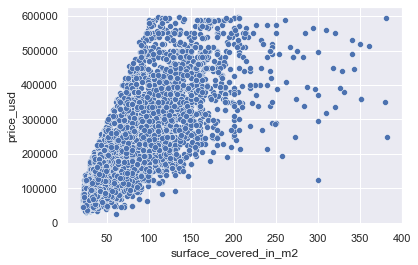

In [23]:
sns.set(style="darkgrid")
sns.scatterplot(x = "surface_covered_in_m2", y = "price_usd", data = datapro_model)
plt.show()

## 2. Estimación del modelo lineal con una variable

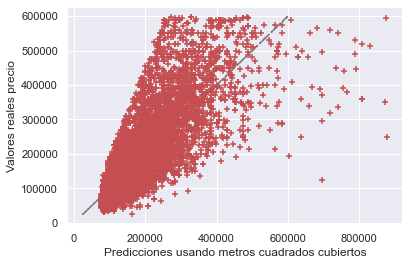

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 1.821e+04
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:25:45   Log-Likelihood:            -1.3199e+05
No. Observations:               10526   AIC:                         2.640e+05
Df Residuals:                   10524   BIC:                         2.640e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.891e+

In [24]:
# Definimos las features, que en este primer contacto serán los metros cuadrados y la variable precio que será el target.
X = datapro_model[["surface_covered_in_m2"]]
y = datapro_model[["price_usd"]]
#Eliminamos valores nulos que puedan interferir con el modelo

# Se agrega una constante para que el modelo tenga ordenada al origen:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions_1 = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions_1, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando metros cuadrados cubiertos")
plt.ylabel("Valores reales precio")
plt.show()

print (model.summary())


## 3. Estimación del modelo lineal multivariable

In [25]:
#Definimos un nuevo dataset sólo con los valores que nos interesan para el estudio
data.columns

Index(['price_usd', 'surface_covered_in_m2', 'Orientacion_al_frente', 'comuna',
       'rooms', 'Patio', 'Paga expensas', 'A_estrenar', 'Ascensor',
       'comuna_10', 'comuna_9', 'comuna_8', 'comuna_7', 'comuna_6', 'comuna_5',
       'comuna_4', 'comuna_3', 'comuna_2'],
      dtype='object')

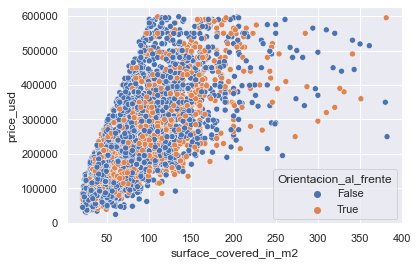

In [26]:
#Observamos si existe relación entre los datos
sns.set(style="darkgrid")
sns.scatterplot(x = "surface_covered_in_m2", y = "price_usd", hue= "Orientacion_al_frente", data = data)
plt.show()


In [27]:
#convertimos las dummies en int para poder agregar al modelo
data["Orientacion_al_frente"] = data["Orientacion_al_frente"].astype(int)
data["Patio"] = data["Patio"].astype(int)
data["Paga expensas"] = data["Paga expensas"].astype(int)
data["A_estrenar"] = data["A_estrenar"].astype(int)
data["Ascensor"] = data["Ascensor"].astype(int)

#data['Orientacion_al_frente'].head()

#data["comuna_15"] = data["comuna_15"].astype(int)
data['comuna_14'] = data['comuna_14'].astype(int)
data["comuna_13"] = data["comuna_13"].astype(int)
data["comuna_12"] = data["comuna_12"].astype(int)
data["comuna_11"] = data["comuna_11"].astype(int)
data["comuna_10"] = data["comuna_10"].astype(int)
data["comuna_9"] = data["comuna_9"].astype(int)
data["comuna_8"] = data["comuna_8"].astype(int)
data["comuna_7"] = data["comuna_7"].astype(int)
data["comuna_6"] = data["comuna_6"].astype(int)
data["comuna_5"] = data["comuna_5"].astype(int)
data["comuna_4"] = data["comuna_4"].astype(int)
data["comuna_3"] = data["comuna_3"].astype(int)
data["comuna_2"] = data["comuna_2"].astype(int)

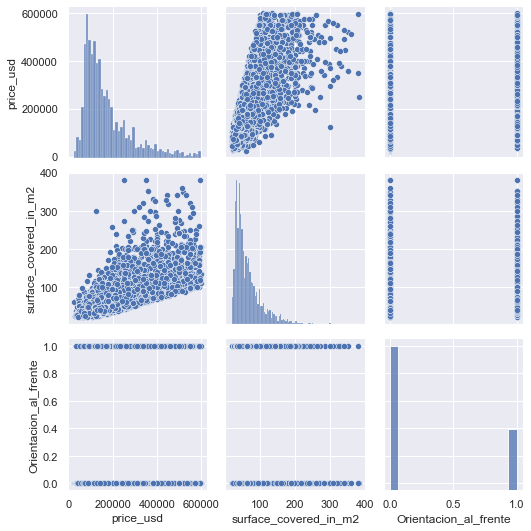

In [28]:
sns.pairplot(data[["price_usd","surface_covered_in_m2",'Orientacion_al_frente']])

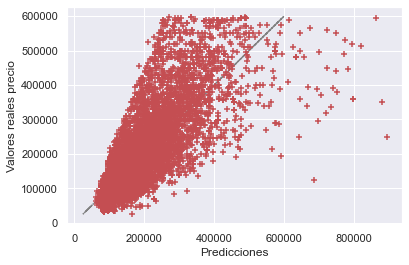

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3059.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:25:48   Log-Likelihood:            -1.3196e+05
No. Observations:               10526   AIC:                         2.639e+05
Df Residuals:                   10519   BIC:                         2.640e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.909e+

In [29]:
# Definimos las features, que en este primer contacto serán los metros cuadrados y la variable precio que será el target.
X = data[['surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio']]
y = data[["price_usd"]]
#Eliminamos valores nulos que puedan interferir con el modelo

# Se agrega una constante para que el modelo tenga ordenada al origen:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales precio")
plt.show()

print (model.summary())

In [30]:
predictions

13         92681.016876
14         98872.987239
19        241124.350230
21        180706.651252
29        126540.031410
              ...      
120182    112779.990217
120183     99478.669501
120184    114996.877003
120185    243488.229282
120186    117213.763789
Length: 10526, dtype: float64

In [31]:
predictions_1

13         95563.913160
14         97785.627274
19        242197.044690
21        191097.620066
29        124446.196643
              ...      
120182    113337.626072
120183    100007.341388
120184    115559.340186
120185    242197.044690
120186    117781.054301
Length: 10526, dtype: float64

In [32]:
(predictions_1-predictions).mean()

5.53523694336168e-09

In [33]:
#Comprobamos si los resultados son iguales
(predictions_1 == predictions)

13        False
14        False
19        False
21        False
29        False
          ...  
120182    False
120183    False
120184    False
120185    False
120186    False
Length: 10526, dtype: bool

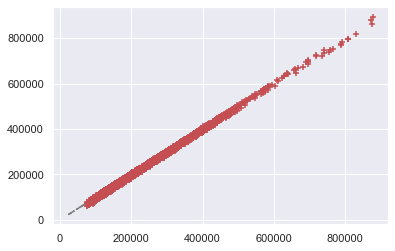

In [34]:
# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions_1, predictions, s=30, c='r', marker='+', zorder=10)
plt.xlabel("")
plt.ylabel("")
plt.show()

# Modelo Multivariable con Scikit Learn

In [35]:
# Definimos las features, que en este primer contacto serán los metros cuadrados y la variable precio que será el target.
feature_cols = ['surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio','comuna_2',
                'comuna_3','comuna_4','comuna_5','comuna_6','comuna_7','comuna_8','comuna_9','comuna_10',
                ]
X_2 = data[feature_cols]
y_2 = data[["price_usd"]]

# Importamos paquete, instanciamos el estimador y fiteamos el modelo
from sklearn.linear_model import LinearRegression

# Instanciamos el modelo
linreg = LinearRegression()

# Entrenamos el modelo 
linreg.fit(X, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

## para observarlo mejor miramos el nombre con el coeficiente
list(zip(feature_cols, linreg.coef_))




[29085.09413381]
[[     0.           2216.88678598  -3975.08357629   1064.40273952
    3612.57980527  -1611.20452378 -14468.78921604]]


[('surface_covered_in_m2',
  array([     0.        ,   2216.88678598,  -3975.08357629,   1064.40273952,
           3612.57980527,  -1611.20452378, -14468.78921604]))]

In [36]:
data.columns

Index(['price_usd', 'surface_covered_in_m2', 'Orientacion_al_frente', 'comuna',
       'rooms', 'Patio', 'Paga expensas', 'A_estrenar', 'Ascensor',
       'comuna_10', 'comuna_9', 'comuna_8', 'comuna_7', 'comuna_6', 'comuna_5',
       'comuna_4', 'comuna_3', 'comuna_2'],
      dtype='object')

# Comparando modelos usando sets de entrenamiento/test

### Calculamos el error cuadrático medio para el modelo de regresión lineal con distintas columnas


In [44]:
# Definimos una función que acepta una lista de features, hace el split entre train y test,
# reservando un 25% de las observaciones para testeo, y devuelve la prueba RMSE.

from sklearn.model_selection import train_test_split
from sklearn import metrics

def train_test_rmse(feature_cols):
    X = data[feature_cols]
    y = data[['price_usd']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [45]:
# comparamos diferentes ensambles de features
print (train_test_rmse(['surface_covered_in_m2']))
print (train_test_rmse(['surface_covered_in_m2','Orientacion_al_frente']))
print (train_test_rmse(['surface_covered_in_m2','Orientacion_al_frente','Patio']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio','comuna_2',
                        'comuna_3',
                        'comuna_4',
                        'comuna_5',
                        'comuna_6','comuna_7','comuna_8','comuna_9','comuna_10']))

68945.20396576074
67411.99888975878
66973.06902865932
67687.00461858344
68845.21733323073
70323.24139596744
66449.39806987529
62011.24086287774


In [43]:
#Repetimos para el set de entrenamiento

def train_test_rmse(feature_cols):
    X = data[feature_cols]
    y = data[['price_usd']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_train)
    return np.sqrt(metrics.mean_squared_error(y_train, y_pred))

# comparamos diferentes ensambles de features
print (train_test_rmse(['surface_covered_in_m2']))
print (train_test_rmse(['surface_covered_in_m2','Orientacion_al_frente']))
print (train_test_rmse(['surface_covered_in_m2','Orientacion_al_frente','Patio']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio']))
print (train_test_rmse([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio','comuna_2',
                        'comuna_3',
                        'comuna_4',
                        'comuna_5',
                        'comuna_6','comuna_7','comuna_8','comuna_9','comuna_10']))

68253.31776983112
66709.8745154858
67942.30846946243
66742.16495681851
67121.58931887263
66202.99363058801
67736.92028292191
62586.04911274325


### Calculamos el R2 para el modelo de regresión lineal con distintas columnas

In [46]:
def r2_score(feature_cols):
    X = data[feature_cols]
    y = data[['price_usd']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.r2_score(y_test, y_pred)

# comparamos diferentes ensambles de features
print (r2_score(['surface_covered_in_m2']))
print (r2_score(['surface_covered_in_m2','Orientacion_al_frente']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms']))
print (r2_score(['surface_covered_in_m2','Orientacion_al_frente','Patio']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio','comuna_2',
                        'comuna_3',
                        'comuna_4',
                        'comuna_5',
                        'comuna_6','comuna_7','comuna_8','comuna_9','comuna_10']))


0.6051630576790965
0.6491480022911698
0.6296221165982133
0.634444533374722
0.6119530065880692
0.620136216183846
0.6327222265380306
0.6892310070214023


In [47]:
#Repetimos para el set de entrenamiento
def r2_score(feature_cols):
    X = data[feature_cols]
    y = data[['price_usd']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_train)
    return metrics.r2_score(y_train, y_pred)

# comparamos diferentes ensambles de features
print (r2_score(['surface_covered_in_m2']))
print (r2_score(['surface_covered_in_m2','Orientacion_al_frente']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms']))
print (r2_score(['surface_covered_in_m2','Orientacion_al_frente','Patio']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio']))
print (r2_score([ 'surface_covered_in_m2','Orientacion_al_frente','rooms','A_estrenar','Ascensor','Patio','comuna_2',
                        'comuna_3',
                        'comuna_4',
                        'comuna_5',
                        'comuna_6','comuna_7','comuna_8','comuna_9','comuna_10']))


0.6371611386702489
0.6257278533601223
0.6295384600108596
0.6364303765448351
0.6324609534515633
0.638866749734985
0.6342827455751812
0.6995846566977153


In [ ]:
# Definimos las features, que en este primer contacto serán los metros cuadrados y la variable precio que será el target.

feature_cols = ["surface_covered_in_m2","Orientacion_al_frente",'comuna_10','comuna_9','comuna_8','comuna_7','comuna_6','comuna_5','comuna_4','comuna_3','comuna_2']
X_3 = data[feature_cols]
y_3 = data[["price_usd"]]

# Importamos paquete, instanciamos el estimador y fiteamos el modelo
from sklearn.linear_model import LinearRegression

# Instanciamos el modelo
linreg = LinearRegression()

# Entrenamos el modelo 
linreg.fit(X, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

list(zip(feature_cols, linreg.coef_))

# 4. Modelo definitivo

Luego de evaluar las combinaciones posibles, el modelo que mejor predice el valor de un departamento en capital federal es el que incluye las siguientes variables:
 -Superficie cubierta
 -Orientación al frente
 -Ascensor
 -Patio
 -Comuna a la que pertenece el departamento

In [49]:
#Modelo final
feature_cols = ['surface_covered_in_m2','Orientacion_al_frente','Ascensor','Patio','comuna_2','comuna_3','comuna_4','comuna_5',
                'comuna_6','comuna_7','comuna_8','comuna_9','comuna_10']
X = data[feature_cols]
y = data[['price_usd']]
   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [51]:
#El vector con los coeficientes del modelo de regresión final es:
linreg.coef_

array([[ 2.17336457e+03, -3.26331305e+03, -8.07923570e+01,
        -1.38376974e+04,  3.61490759e+04, -5.80639115e+04,
        -5.09337617e+04, -3.65003661e+04, -1.63704495e+04,
        -4.51420502e+04, -1.04224722e+05, -4.85881789e+04,
        -4.77585526e+04]])

In [52]:
#La ordenada al origen:
linreg.intercept_

array([45884.22975936])